In [9]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from PIL import ImageColor

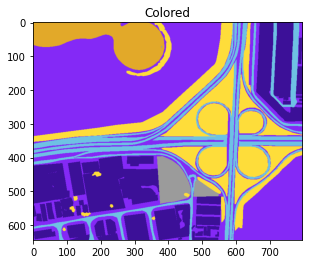

(797, 644)


In [10]:
img_file = "/home/ralampay/workspace/notebooks/Images/sample_mask.png"

img = cv2.imread(img_file)

rows, cols = img.shape[:2]
dimensionality = (cols, rows)

# Convert OpenCV BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img.astype('float32') / 255)
plt.title('Colored')
plt.show()

print(dimensionality)

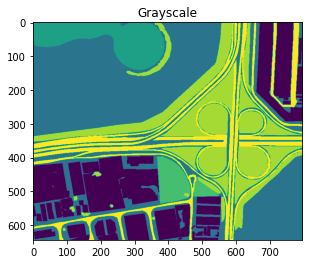

In [11]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray.astype('float32') / 255)
plt.title('Grayscale')
plt.show()

In [12]:
unique_values = np.unique(gray)

unique_values

array([ 62, 113, 137, 155, 176, 194], dtype=uint8)

In [18]:
def convert_to_labeled_tiff(img_grayscale, unique_values):
    rows, cols = img_grayscale.shape[:2]
    tiff = np.zeros((rows, cols), dtype=np.uint8)
    
    for r in range(rows):
        for c in range(cols):
            for idx, val in enumerate(unique_values):
                if val == img_grayscale[r, c]:
                    tiff[r, c] = idx
    
    return tiff
    
img_tiff = convert_to_labeled_tiff(gray, unique_values)

img_tiff

array([[2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

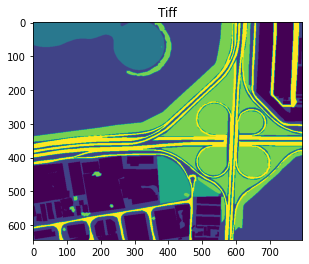

In [20]:
plt.imshow(img_tiff.astype('float32') / len(unique_values))
plt.title('Tiff')
plt.show()